# 1. Import Libraries

In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    plot_confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [3]:
classes = ['angular_leaf_spot', 'bean_rust', 'healthy']

In [4]:
X = np.empty([0, 32*32*3])
y = np.empty([0, 1])

for _class in tqdm(classes):
    img_path = glob('dataset/' + _class + '/*')
    for path in tqdm(img_path):
        img = Image.open(path)
        img = img.resize([32, 32])
        img = np.array(img)
        if img.shape[2] == 4:
            img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        img = img.reshape(1, -1)
        X = np.vstack([X, img])
        if _class == 'healthy':
            y = np.vstack([y, 'healthy'])
        else:
            y = np.vstack([y, 'unhealthy'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/337 [00:00<?, ?it/s]

# ### 3. Clean Data

# 4. Split Dataset into Traning & Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3 Feature Scaling

### 5.3.1. Training Set

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [7]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

In [8]:
##### logistic regression #####
# clf = LogisticRegression(penalty='none')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l2 regularization #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l2', Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l1 regularization #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l1', solver='saga', Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression with elastic net regularization #####
# alphas = np.logspace(-3, 3, num=100)
# l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
# clf = LogisticRegressionCV(penalty='elasticnet', solver='saga', 
#                            l1_ratios=l1_ratios, Cs=alphas, cv=5)
# clf.fit(X_train_scaled, y_train)


##### logistic regression + balanced class weight #####
# clf = LogisticRegression(penalty='none', class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l2 regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l2', Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with l1 regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# clf = LogisticRegressionCV(penalty='l1', solver='saga', Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)


##### logistic regression with elastic net regularization + balanced class weight #####
# alphas = np.logspace(-3, 3, num=100)
# l1_ratios = [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
# clf = LogisticRegressionCV(penalty='elasticnet', solver='saga', 
#                            l1_ratios=l1_ratios, Cs=alphas, cv=5, class_weight='balanced')
# clf.fit(X_train_scaled, y_train)

In [9]:
clf = LogisticRegression(penalty='none', class_weight='balanced')
clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', penalty='none')

In [10]:
clf.intercept_

array([23.02255425])

In [11]:
clf.coef_

array([[ 2.45020904, -0.37758282,  1.19990849, ...,  0.73402805,
         2.06843319,  5.51439207]])

# 7. Prediction

## 7.1. Training Set

In [12]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [13]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

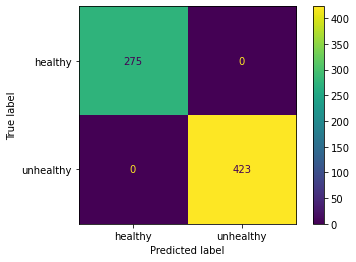

In [14]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [15]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [16]:
print('accuracy =', report['accuracy'])

accuracy = 1.0


In [17]:
report['healthy']

{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 275}

In [18]:
report['unhealthy']

{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 423}

## 8.2. Test Set

### 8.2.1. Confusion Matrix

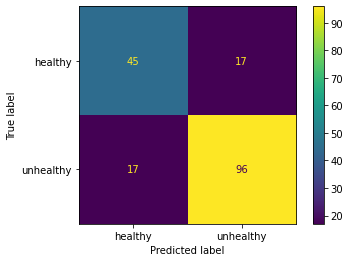

In [19]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [20]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [21]:
print('accuracy =', report['accuracy'])

accuracy = 0.8057142857142857


In [22]:
report['healthy']

{'precision': 0.7258064516129032,
 'recall': 0.7258064516129032,
 'f1-score': 0.7258064516129032,
 'support': 62}

In [23]:
report['unhealthy']

{'precision': 0.8495575221238938,
 'recall': 0.8495575221238938,
 'f1-score': 0.8495575221238938,
 'support': 113}

# 9. Save Model

In [24]:
import pickle

In [25]:
pickle.dump((clf, scaler), open('plant_disease_model.pickle', 'wb'))